# Importing Libaries

In [14]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation, Conv2D, MaxPool2D, Dense,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing .image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Image Data Agumentation

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Loading the data and performing data agumentation

In [16]:
x_train = train_datagen.flow_from_directory(r"Dataset\\dataset\\train",target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test = test_datagen.flow_from_directory(r"Dataset\\dataset\\test",target_size = (64,64),batch_size = 32,class_mode = "categorical")

train_generator = train_datagen.flow_from_directory(
    r"Dataset\\dataset\\train\\",
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    color_mode='grayscale',
)

test_generator = test_datagen.flow_from_directory(
    r"Dataset\\dataset\\test\\",
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    color_mode='grayscale',
 
)

Found 7496 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.
Found 7496 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


In [17]:
x_train.class_indices

{'circle': 0, 'rhombus': 1, 'square': 2, 'trapezoid': 3, 'triangle': 4}

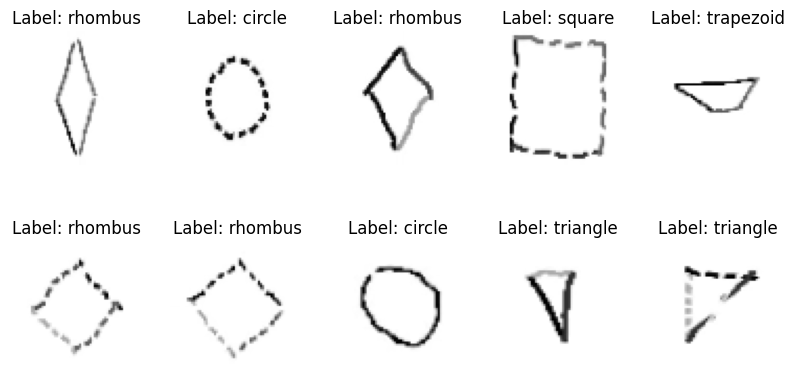

In [18]:
import matplotlib.pyplot as plt

# get the mapping between class indices and their corresponding class names
class_names = list(train_generator.class_indices.keys())

# get a batch of data from the training generator
x_batch, y_batch = next(train_generator)

# convert y_batch to a list of integers
y_batch = y_batch.astype(int).tolist()

# plot the first 10 images in the batch
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_batch[i], cmap='gray')
    class_index = y_batch[i]
    class_name = class_names[class_index]
    ax.set_title('Label: {}'.format(class_name))
    ax.axis('off')
    if i == 9:
        break

plt.show()


# Building the Model

In [19]:
model = Sequential()
model.add(Conv2D(input_shape=(64,64,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=7, activation="softmax")) 

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0

# Compile and Fit the Model

### Set CallBack
The training loop will be checked at end of every epoch for whether the loss is no longer decreasing. Once it's found no longer decreasing, the training terminates. This prevents overfitting 

patience indicates the number of epochs with no improvement after which training will be stopped.
monitor indicates the quantity to be monitored. In this case, it will be the loss

In [21]:
#set callback
callback = EarlyStopping(monitor='val_loss', patience=5)

# monitor: Quantity to be monitored.
# patience: Number of epochs with no improvement after which training will be stopped.

In [22]:
model.compile(optimizer= "adam",loss = "sparse_categorical_crossentropy" , metrics =["accuracy"])


In [23]:
model_history = model.fit(train_generator, epochs = 40 , validation_data = test_generator,validation_steps = 10,callbacks=[callback])

Epoch 1/40
235/235 [==============================] - 116s 457ms/step - loss: 0.7128 - accuracy: 0.7126 - val_loss: 0.2359 - val_accuracy: 0.9312
Epoch 2/40
235/235 [==============================] - 15s 62ms/step - loss: 0.1646 - accuracy: 0.9406 - val_loss: 0.0699 - val_accuracy: 0.9750
Epoch 3/40
235/235 [==============================] - 14s 60ms/step - loss: 0.0945 - accuracy: 0.9662 - val_loss: 0.0384 - val_accuracy: 0.9875
Epoch 4/40
235/235 [==============================] - 13s 57ms/step - loss: 0.0652 - accuracy: 0.9787 - val_loss: 0.1060 - val_accuracy: 0.9594
Epoch 5/40
235/235 [==============================] - 13s 56ms/step - loss: 0.0534 - accuracy: 0.9808 - val_loss: 0.0516 - val_accuracy: 0.9781
Epoch 6/40
235/235 [==============================] - 13s 55ms/step - loss: 0.0425 - accuracy: 0.9861 - val_loss: 0.0169 - val_accuracy: 0.9906
Epoch 7/40
235/235 [==============================] - 13s 55ms/step - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0383 - val_accurac

### Plot Accuracy & Loss Graph Function

In [24]:
#This function is used to plot the accuracy and loss graph from the history
def plot_loss_accuracy_graph(CNN_history, graph_title):
    plt.rc('font', size=10) #controls default text size
    plt.rc('axes', titlesize=10) #fontsize of the title
    plt.rc('axes', labelsize=10) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
    plt.rc('legend', fontsize=10) #fontsize of the legend
    loss = CNN_history.history['loss'] #get loss
    val_loss = CNN_history.history['val_loss'] #get val loss
    acc = CNN_history.history['accuracy'] #get accuracy
    val_acc = CNN_history.history['val_accuracy'] #get val accuracy
    epoch = range(len(loss)) #number of epochs

    plt.figure(figsize=(20, 8)) #plot graph
    plt.suptitle(('{}'.format(graph_title)), fontsize=30)
    plt.subplot(1, 2, 1)
    plt.plot(epoch,loss,label='loss')
    plt.plot(epoch,val_loss,label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch,acc,label='acc')
    plt.plot(epoch,val_acc,label='val_acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

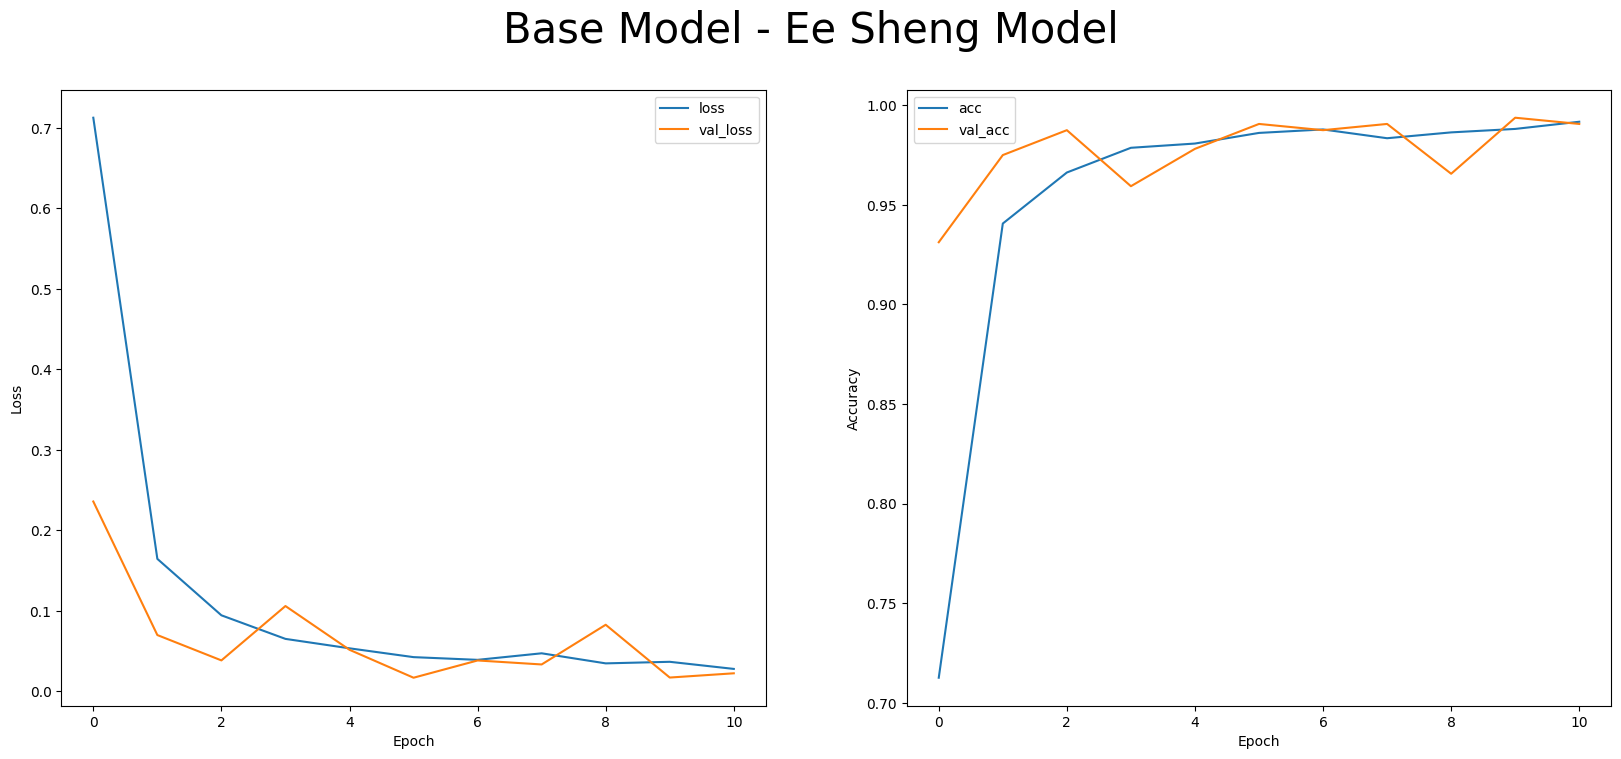

In [25]:
plot_loss_accuracy_graph(model_history, "Base Model - Ee Sheng Model")

### Evaluate the model

In [26]:
# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(train_generator)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)


235/235 [==============================] - 11s 46ms/step - loss: 0.0237 - accuracy: 0.9917
Training Loss: 0.023748476058244705
Training Accuracy: 0.9917289018630981
79/79 [==============================] - 9s 109ms/step - loss: 0.0218 - accuracy: 0.9916
Testing Loss: 0.02180119790136814
Testing Accuracy: 0.991599977016449


### Confusion Matrix

79/79 [==============================] - 2s 28ms/step


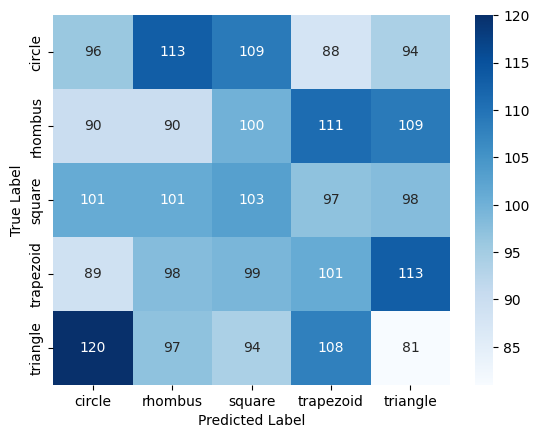

In [27]:
# Get the true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Saving our model

In [28]:
model.save(r"C:\Users\gohee\Desktop\PentaAI\Flask\shapes.h5")

In [29]:
model = load_model(r"C:\Users\gohee\Desktop\PentaAI\Flask\shapes.h5")

# Predicting

In [30]:
img1 = image.load_img(r"C:\Users\gohee\Desktop\PentaAI\Dataset\dataset\test\triangle\triangle-2000.jpg", color_mode='grayscale',target_size = (64,64))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)  # Add an extra dimension to the input data

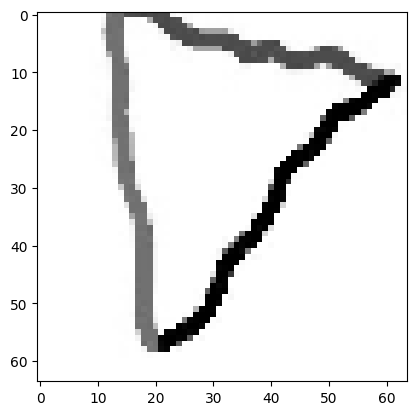

In [31]:
# Display the image
plt.imshow(img1, cmap='gray')
plt.show()

In [32]:
x.shape

(1, 64, 64, 1)

In [33]:
prediction = model.predict(x)

1/1 [==============================] - 0s 343ms/step


In [34]:
predicted_class = np.argmax(prediction)

In [35]:
predicted_class

4

In [36]:
img2 = image.load_img(r"C:\Users\gohee\Desktop\PentaAI\Dataset\dataset\test\rhombus\rhombus-2006.jpg", color_mode='grayscale',target_size = (64,64))
x = image.img_to_array(img2)
x = np.expand_dims(x, axis=0)  # Add an extra dimension to the input data

In [37]:
prediction = model.predict(x)

1/1 [==============================] - 0s 26ms/step


In [38]:
predicted_class = np.argmax(prediction)

In [39]:
predicted_class

1

In [40]:
x_train.class_indices

{'circle': 0, 'rhombus': 1, 'square': 2, 'trapezoid': 3, 'triangle': 4}

In [41]:
img3 = image.load_img(r"C:\Users\gohee\Desktop\PentaAI\Dataset\dataset\test\trapezoid\trapezoid-2006.jpg", color_mode='grayscale',target_size = (64,64))
x = image.img_to_array(img3)
x = np.expand_dims(x, axis=0)  # Add an extra dimension to the input data

In [42]:
prediction = model.predict(x)

1/1 [==============================] - 0s 26ms/step


In [43]:
predicted_class = np.argmax(prediction)

In [44]:
predicted_class

3

In [45]:
x_train.class_indices

{'circle': 0, 'rhombus': 1, 'square': 2, 'trapezoid': 3, 'triangle': 4}